# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [10]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [89]:
from newsapi.newsapi_client import NewsApiClient
from datetime import datetime, timedelta
from nltk.stem import WordNetLemmatizer

In [12]:
load_dotenv()

True

In [13]:
# Read your api key environment variable
# YOUR CODE HERE!
key = os.getenv("NEWS_API_KEY")
print(key)

a68283cd64a046529dc434779dce8ee9


In [14]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=key)

In [6]:
#Utilizing the Get Headlines code from our in-class activities.
def get_headlines(keyword, current_date, past_date):
    all_headlines = []
    all_dates = []  
    date = datetime.strptime(current_date[:19],"%Y-%m-%dT%H:%M:%S").isoformat()
    print(str(date))
    end_date = datetime.strptime(past_date[:19], "%Y-%m-%dT%H:%M:%S").isoformat()
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        str_date = str(date)
        str_end_date = str(end_date)
        articles = newsapi.get_everything(
            q=keyword,
            from_param=(str_date),
            to=(str_date),
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [17]:
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for day in headlines:
        day_score = []
        for h in day:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [16]:
articles = newsapi.get_everything(
            q=str('bitcoin'),
            from_param=str('2021-02-21'),
            to=str('2021-01-21'),
            language=str("en")
        )
print(articles)

In [54]:
eth_articles = newsapi.get_everything(
            q=str('ethereum'),
            from_param=str('2021-02-21'),
            to=str('2021-01-21'),
            language=str("en")
        )

In [18]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [16]:
#for article in articles:
    

{'status': 'ok', 'totalResults': 8644, 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Jon Fingas', 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment', 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…', 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html', 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a', 'publishedAt': '2021-02-08T14:01:09Z', 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Ju

In [8]:
all_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2017-12-01',
                                      to='2017-12-12',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

TypeError: expected string or bytes-like object

In [142]:
#Set our date range for grabbing articles.
today = pd.Timestamp("2021-02-21", tz="America/New_York",microsecond=None,nanosecond=None).isoformat()
a_month_ago = (pd.Timestamp("2021-01-21", tz="America/New_York").isoformat())
print(today)

2021-02-21T00:00:00-05:00


In [143]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = get_headlines("bitcoin OR btc", today, a_month_ago)

In [24]:
print(articles)

{'status': 'ok', 'totalResults': 8644, 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Jon Fingas', 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment', 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…', 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html', 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a', 'publishedAt': '2021-02-08T14:01:09Z', 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Ju

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

In [48]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiment_df = pd.DataFrame(columns=['Compound','Negative','Neutral','Positive','text'])
print(bitcoin_sentiment_df)
for article in articles['articles']:
    print(article)
    if article['content'] != None:
        content = article['content']
    else:
        content = 'blank'
    print(sid.polarity_scores(content)["compound"])
    print("///")
    series = pd.Series([sid.polarity_scores(content)["compound"],
                                 sid.polarity_scores(content)["neg"],
                                 sid.polarity_scores(content)["neu"],
                                 sid.polarity_scores(content)["pos"],
                                 content],index=bitcoin_sentiment_df.columns)
    bitcoin_sentiment_df = bitcoin_sentiment_df.append(series,ignore_index=True)
    """bitcoin_sentiment_df['Compound']= sid.polarity_scores(content)["compound"]
    bitcoin_sentiment_df['Negative']= sid.polarity_scores(content)["neg"]
    bitcoin_sentiment_df['Neutral']= sid.polarity_scores(content)["neu"]
    bitcoin_sentiment_df['Postive']= sid.polarity_scores(content)["pos"]
    bitcoin_sentiment_df['text']= content"""

Empty DataFrame
Columns: [Compound, Negative, Neutral, Positive, text]
Index: []
{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Jon Fingas', 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment', 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…', 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html', 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a', 'publishedAt': '2021-02-08T14:01:09Z', 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}
0.3182
///
{'source': {'id': 'the-verg

In [53]:
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.156740,0.024600,0.907200,0.068200
std,0.380843,0.038538,0.080787,0.083499
min,-0.503700,0.000000,0.647000,0.000000
25%,-0.025675,0.000000,0.862250,0.000000
50%,0.088950,0.000000,0.912500,0.053500
75%,0.391725,0.041250,0.956750,0.093500
max,0.921700,0.114000,1.000000,0.353000


In [55]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiment_df = pd.DataFrame(columns=['Compound','Negative','Neutral','Positive','text'])
for article in eth_articles['articles']:
    if article['content'] != None:
        content = article['content']
    else:
        content = 'blank'
    print(sid.polarity_scores(content)["compound"])
    print("///")
    series = pd.Series([sid.polarity_scores(content)["compound"],
                                 sid.polarity_scores(content)["neg"],
                                 sid.polarity_scores(content)["neu"],
                                 sid.polarity_scores(content)["pos"],
                                 content],index=ethereum_sentiment_df.columns)
    ethereum_sentiment_df = ethereum_sentiment_df.append(series,ignore_index=True)

In [57]:
ethereum_sentiment_df.shape

(20, 5)

In [58]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.156740,0.024600,0.907200,0.068200
std,0.380843,0.038538,0.080787,0.083499
min,-0.503700,0.000000,0.647000,0.000000
25%,-0.025675,0.000000,0.862250,0.000000
50%,0.088950,0.000000,0.912500,0.053500
75%,0.391725,0.041250,0.956750,0.093500
max,0.921700,0.114000,1.000000,0.353000


In [59]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.005950,0.942750,0.051300
std,0.274088,0.026609,0.062097,0.054785
min,-0.340000,0.000000,0.818000,0.000000
25%,0.000000,0.000000,0.900000,0.000000
50%,0.012900,0.000000,0.949500,0.046500
75%,0.365100,0.000000,1.000000,0.082000
max,0.709600,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin, at .07 vs .05.

Q: Which coin had the highest compound score?

A: Bitcoin, at .92 vs .71.

Q. Which coin had the highest positive score?

A: Bitcoin, at .35 vs .14.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [63]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
print(sw)

{'there', 'some', 'hasn', "isn't", "mightn't", 'his', 'i', 'what', 'out', 'm', 'couldn', 'same', 'does', 'shouldn', 'between', 'during', 'me', "hadn't", 'don', "shan't", 'doesn', 'how', "that'll", 'y', 'needn', 'a', 'both', 'by', 'doing', 'not', 'won', 'our', 'your', 'my', 'itself', 'mightn', 's', 'had', 'her', 'the', 'to', 'do', "aren't", 'you', 'themselves', 'for', 'were', 'about', 'so', 'hadn', 'through', 'shan', "needn't", 'am', 'in', 'after', 'now', 'while', "don't", 'other', "hasn't", 'but', 'having', "weren't", 'very', 'hers', 'any', 'theirs', 'yourselves', "you're", 'again', 'no', 'mustn', 't', 'ourselves', 'he', "didn't", 'we', 'at', 'or', 'here', 'below', 'under', 'who', 'ain', 'when', 'too', 'all', 'before', 'up', 'weren', 'haven', "couldn't", 'until', 're', "haven't", 'have', 'down', 'yours', 'on', 'ours', 'because', 'above', 'myself', 'can', 'that', 'than', 'himself', 'own', 'them', 'whom', "won't", 'an', 'once', 'why', 'these', "you'd", 'into', 'off', 'was', 'this', 've',

In [124]:
# Complete the tokenizer function
def tokenizer(text_object, stop_words = []):
    """ Tokenizes text, I added an extra input for extra stop words. The process here is largely borrowed from
        the order of operations as used in class activity counter.ipynb, as that order of token operations
        makes more sense to me."""
    text = str(text_object)
    #Instantiate Lemmatizer
    lemmatizer = WordNetLemmatizer()
    #Define unique set of essential English Stop Words.
    sw = set(stopwords.words('english'))
    #Add extra stop words to our set of stop words, if passed to this function.
    sw.update(stop_words)
    #Filter the text for puncuation, but leaving numerals intact.
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    #Tokenize the text into a list of words.
    word_list = word_tokenize(re_clean)
    #Apply the lemmatizer to the word list(set).
    lem = [lemmatizer.lemmatize(word) for word in word_list]
    #Lowercase the words in our set if they are not featured in our list of stop words.
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [125]:
content_test = bitcoin_sentiment_df.loc[0]['text']
tokenizer(content_test)

['elon',
 'musks',
 'cryptocurrency',
 'hype',
 'wa',
 'idle',
 'talk',
 'cnbcreports',
 'tesla',
 'bought',
 '15',
 'billion',
 'worth',
 'bitcoin',
 'help',
 'diversify',
 'maximize',
 'return',
 'start',
 'taking',
 'pay',
 '1182',
 'char']

In [116]:
for row in df_bitcoin:
    print(row)

In [127]:
df_bitcoin

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."
5,0.1779,0.032,0.916,0.051,When Bitcoin first appeared out of digital thi...,"[bitcoin, first, appeared, digital, thin, air,..."
6,0.0000,0.000,1.000,0.000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,"[tldr, bitcoin, cryptocurrency, mastery, bundl..."
7,0.0000,0.000,1.000,0.000,"LiveUpdated Feb. 9, 2021, 8:01 a.m. ET\r\nFeb....","[liveupdatedfeb, 9, 2021, 801, etfeb, 9, 2021,..."
8,0.0000,0.000,1.000,0.000,blank,[blank]
9,0.7041,0.000,0.860,0.140,"Bitcoin is the future, again: this morning, it...","[bitcoin, future, morning, hit, alltime, high,..."


In [126]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
df_bitcoin = bitcoin_sentiment_df.copy()
df_bitcoin['tokens'] = df_bitcoin['text'].apply(tokenizer)

In [128]:
df_bitcoin['tokens']

0     [elon, musks, cryptocurrency, hype, wa, idle, ...
1     [tesla, led, elon, musk, confirmed, purchased,...
2     [brief, moment, sunday, tesla, said, invested,...
3     [twitter, square, ceo, jack, dorsey, rapper, j...
4     [today, sec, filing, tesla, disclosed, ha, acq...
5     [bitcoin, first, appeared, digital, thin, air,...
6     [tldr, bitcoin, cryptocurrency, mastery, bundl...
7     [liveupdatedfeb, 9, 2021, 801, etfeb, 9, 2021,...
8                                               [blank]
9     [bitcoin, future, morning, hit, alltime, high,...
10    [jack, dorsey, jay, z, create, bitcoin, endowm...
11    [case, havent, noticed, bitcoins, bit, moment,...
12    [miamis, mayor, francis, suarez, champing, bit...
13    [man, said, wa, inevitableon, friday, tesla, c...
14    [president, joe, bidens, pick, new, comptrolle...
15    [cryptocurrencies, thing, valuable, shared, ag...
16    [6, alabamas, longestserving, senator, richard...
17    [coinbase, plan, go, public, way, direct, 

In [131]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
df_ethereum = ethereum_sentiment_df.copy()
df_ethereum['tokens'] = df_ethereum['text'].apply(tokenizer)
df_ethereum.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, 3060, sold, cryptocurr..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [132]:
from collections import Counter
from nltk import ngrams

In [165]:
#Bigram Counter function from class activty counter.ipynb
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    #big_string = ' '.join(corpus)
    processed = tokenizer(corpus)
    bigrams = (ngrams(processed, n=2))
    counted = dict(Counter(bigrams))
    return pd.DataFrame(list(counted.items()), columns=['bigram', 'count'])#bigrams

In [166]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_corpus = df_bitcoin['text'].sum()

bitcoin_bigrams = bigram_counter(bitcoin_corpus)
bitcoin_bigrams

,bigram,count
0,"(elon, musks)",2
1,"(musks, cryptocurrency)",1
2,"(cryptocurrency, hype)",1
3,"(hype, wa)",1
4,"(wa, idle)",1
...,...,...
381,"(currency, current)",1
382,"(current, budget)",1
383,"(budget, sessio)",1
384,"(sessio, 1858)",1


In [168]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_corpus = df_ethereum['text'].sum()

ethereum_bigrams = bigram_counter(ethereum_corpus)
ethereum_bigrams

,bigram,count
0,"(worried, geforce)",1
1,"(geforce, rtx)",1
2,"(rtx, 3060)",2
3,"(3060, sold)",1
4,"(sold, cryptocurrency)",1
...,...,...
332,"(2017, reutersbenoit)",1
333,"(reutersbenoit, tessierillustrationfile)",1
334,"(tessierillustrationfile, photosingapor)",1
335,"(photosingapor, 365)",1


In [169]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [171]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(tokenizer(bitcoin_corpus))

[('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 5),
 ('15', 5),
 ('company', 5),
 ('elon', 4),
 ('wa', 4),
 ('billion', 4),
 ('said', 4),
 ('ha', 4)]

In [172]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokenizer(ethereum_corpus))

[('reuters', 15),
 ('ethereum', 12),
 ('bitcoin', 8),
 ('cryptocurrency', 7),
 ('high', 7),
 ('charsby', 6),
 ('record', 6),
 ('photo', 5),
 ('currency', 5),
 ('feb', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [174]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [178]:
def make_cloud(text):
    wc = WordCloud().generate(text)
    plt.imshow(wc)

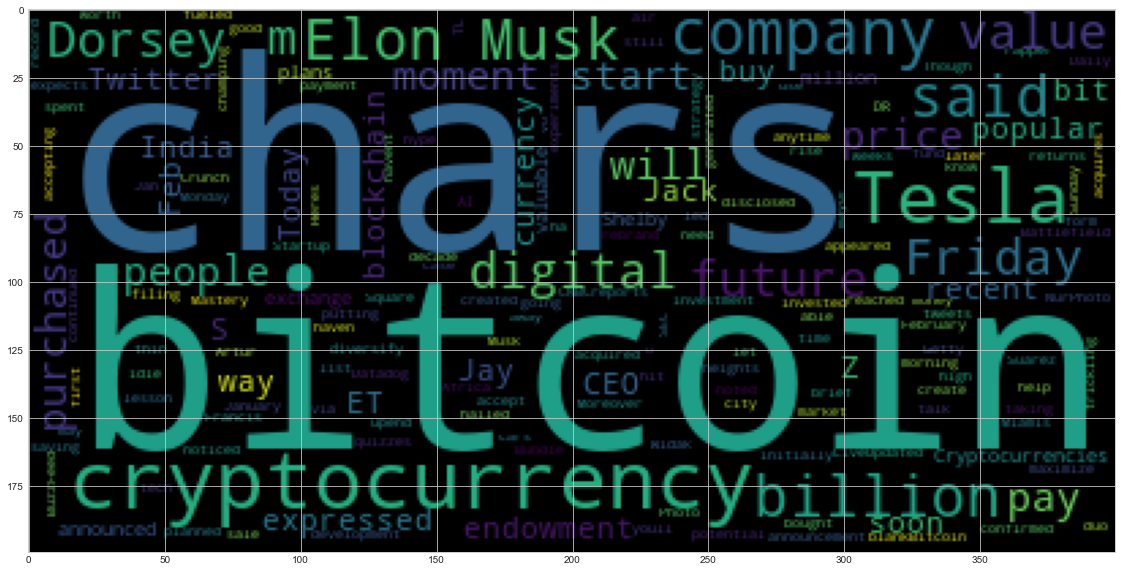

In [179]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
make_cloud(bitcoin_corpus)


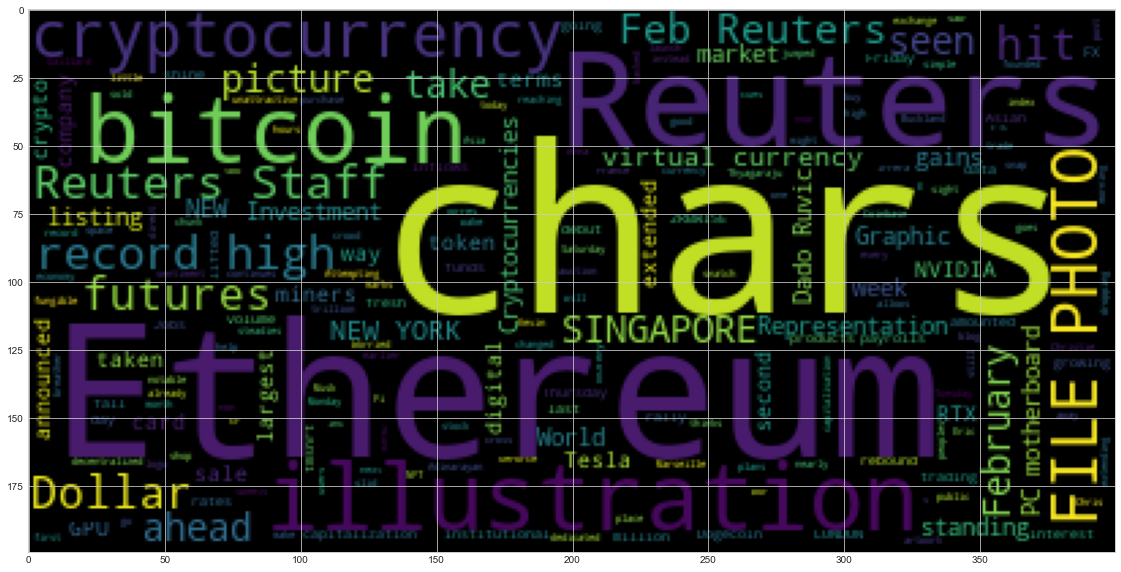

In [180]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
make_cloud(ethereum_corpus)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [182]:
import spacy
from spacy import displacy

In [183]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [184]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

#This already occurred up top! bitcoin_corpus = df_bitcoin['text'].sum()
print(bitcoin_corpus)

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [192]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bit_doc = nlp(bitcoin_corpus)
# Add a title to the document
# YOUR CODE HERE!
bit_doc.

In [193]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bit_doc, style='ent')

In [33]:
# List all Entities
# YOUR CODE HERE!

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f